In [1]:
%%html
<style>
    table{float:left}
</style>

『達人データサイエンティストによる理論と実践 Python機械学習プログラミング 第３版』より  
# 第10章 輪読 回帰分析 --連続値をとる目的変数の予測--  
## 担当範囲
**10.1 線形回帰  
10.2 Housingデータセットの探索  
10.3 最小二乗線形回帰モデルの実装**  
  
第10章では教師あり学習の一つである回帰分析について記載されている。  
回帰分析は連続値をとる目的変数を予測するために使われる。  
例)  
・今日の気温を特徴量として、飲み物の売上を予測  
・株価の予測  

## 10.1 線形回帰 
### 10.1.1 単線形回帰 10.1.2 重線形回帰
線形回帰の目的は、特徴量(**説明変数x**)と連続値の目的変数(**応答変数y**)の関係を最も良く表す直線(線形モデル)を求めることである。説明変数が一つだけの線形モデルの方程式は以下のように表される。  
$$
\hat{y} = w_0 + w_1{x}　…①
$$
ここで $w_0$ はy軸の切片を、$w_1$ は説明変数の係数を表す。  
これを図に表すと以下のようになる。

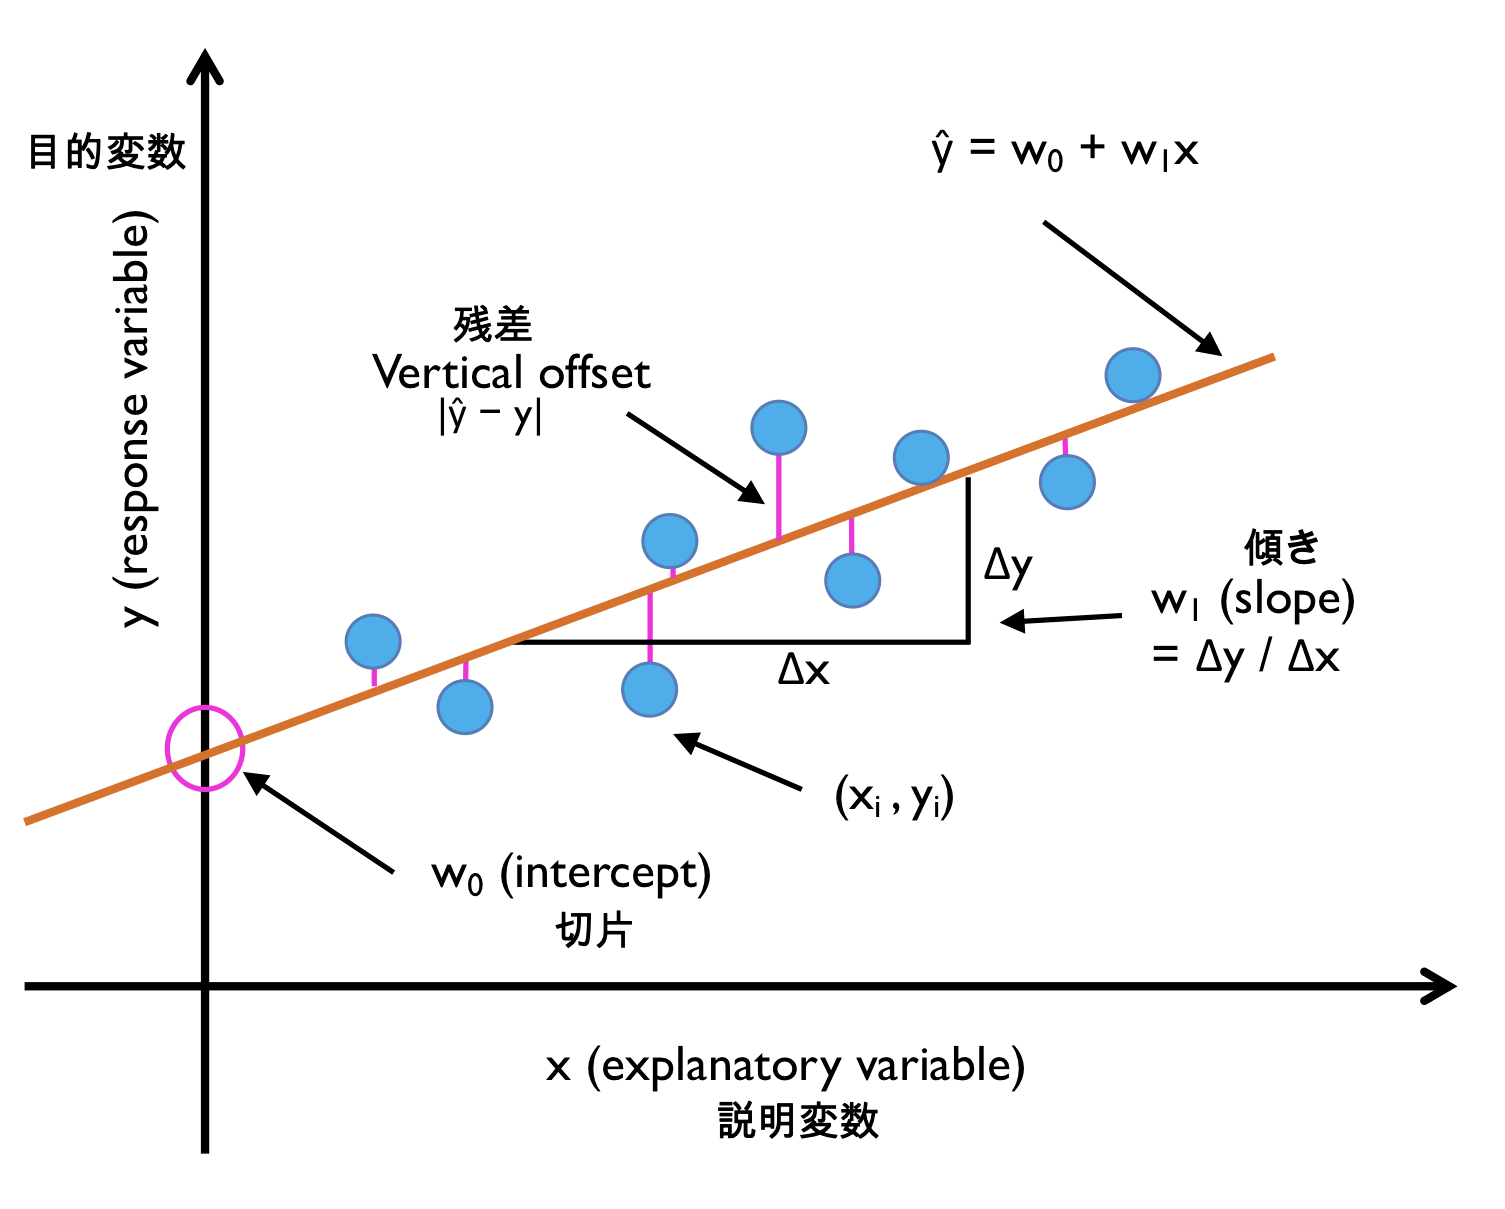

In [2]:
from IPython.display import Image
%matplotlib inline
Image(filename='images/10_01_1.png', width=500)

説明変数と目的変数の関係を最も良く表現している直線(図のオレンジの直線)のことを**回帰直線**という。  
実際の目的変数$y$と回帰直線から得られた予測値 $\hat{y}$ の差 $(\hat{y} - y)$ を残差という。  
回帰直線を求めるには、残差 ($\hat{y} - y$) が最小となるような $w$ を求めればいいと考えられる。   
一つの特徴量と連続値の目的変数との関係をモデルとして表現することを単線形回帰というのに対し、複数の説明変数と目的変数の関係をモデルとして表現することを重線形回帰という。(この章では単回帰を扱っている。)

## 10.2 Housingデータセットの探索  
### 10.2.1データの読み込み 10.2.2 データセットの可視化
今回はボストン近郊の住宅情報を用いて回帰分析を行う。  
まずはpandasで対象のデータセットを読み込む。

In [3]:
import pandas as pd

df = pd.read_csv('/Users/atsukawakenta/Documents/python-machine-learning-book-3rd-edition-master/ch10/housing.data.txt', sep ='\s+')
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


|カラム名|説明|
|-|-|
|CRAIM|犯罪発生率|
|ZN|25000平方フィート以上の住宅区画の割合|
|INDUS|非小売業の土地面積の割合(人口単位)|
|CHAS|チャールズ川沿いかどうか(チャールズ川沿いの場合は1、そうでない場合は0)|
|NOX|窒素酸化物の濃度(pphm 単位)|
|RM|1戸あたりの部屋数|
|AGE|1940年よりも前に建てられた家屋の割合|
|DIS|ボストンの主な5つの雇用権までの重み付きの距離|
|RAD|幹線道路へのアクセス指数|
|TAX|10000ドルあたりの所得税率|
|PTRATIO|教師一人当たりの生徒の数|
|B|$1000(Bk - 0.63)^2$として計算:$Bk$はアフリカ系アメリカ人住居社の割合(人口単位)|
|LSTAT|低所得者の割合|
|MEDV|住宅価格の中央値(単位1000ドル)|

In [4]:
df.isnull().sum() #欠損値の確認

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

今回は目的変数としてMEDV(住宅価格の中央値)を扱う。

次に散布図を作成し、各データの関係性を見てみる。

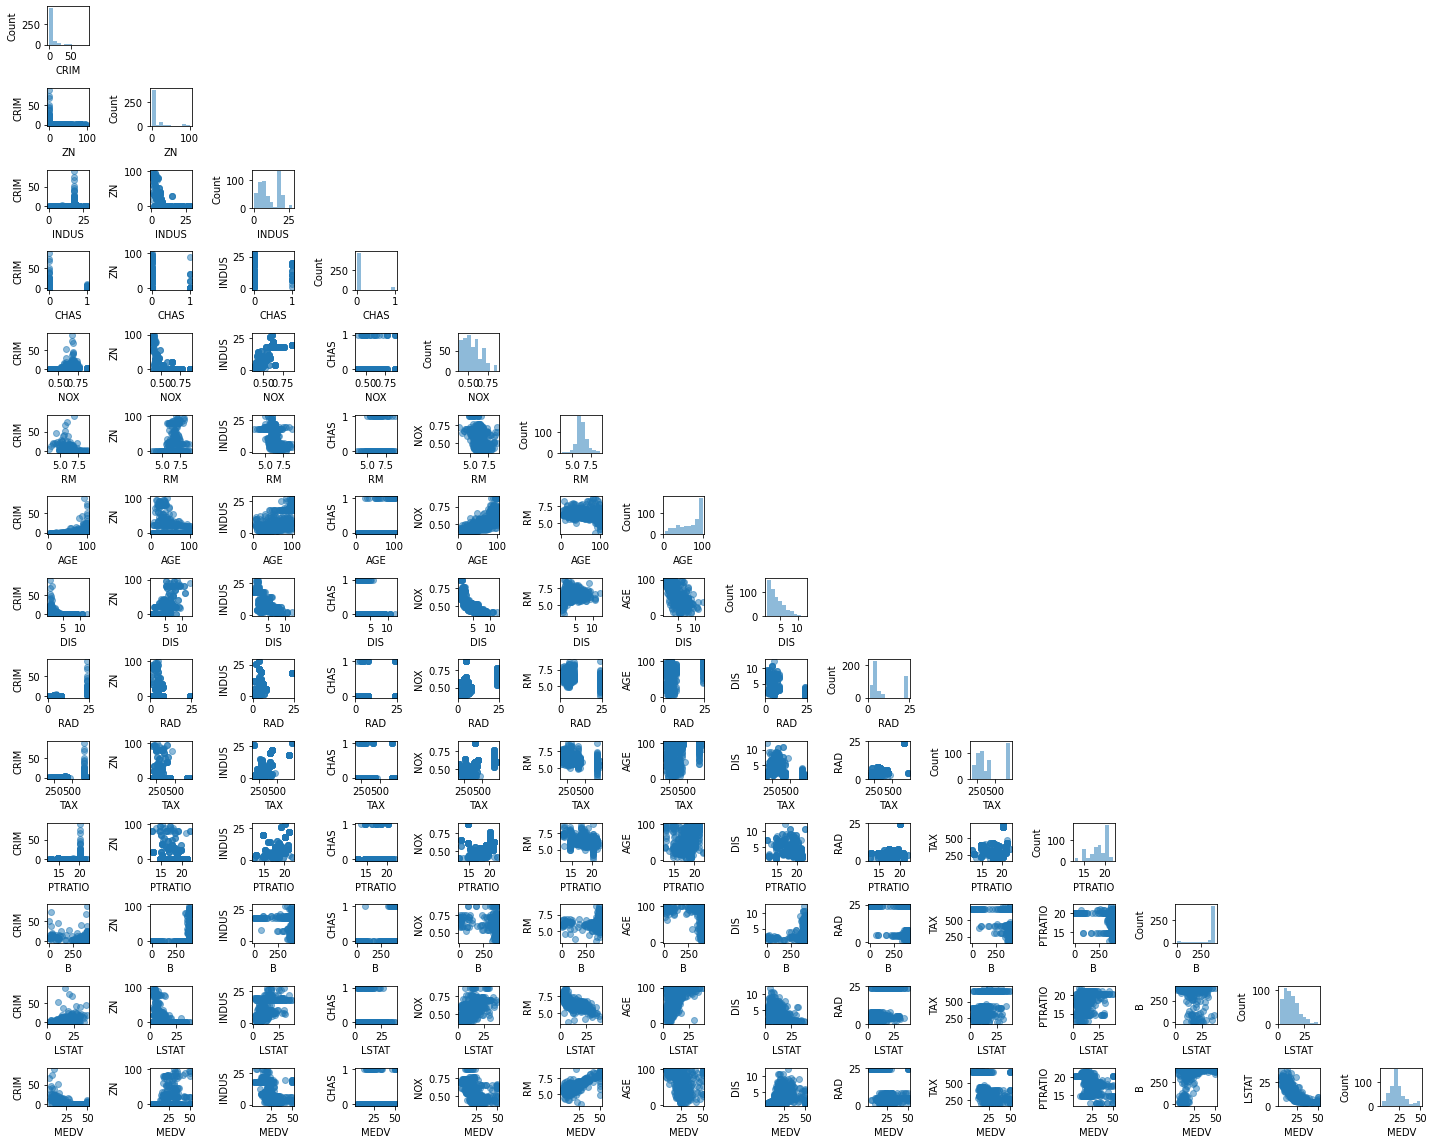

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols2 = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
scatterplotmatrix(df[cols2].values, figsize=(20,16), names=cols2, alpha=0.5)
plt.tight_layout()
plt.show()

可読性が低いのでいくつか厳選した散布図を表示する。(本書ではLSTAT(低所得者の割合)、INDUS(非小売業の土地面積の割合)、NOX(窒素酸化物の濃度)、RM(部屋の数)、MEDV(住宅価格)だけをプロットしていた。)

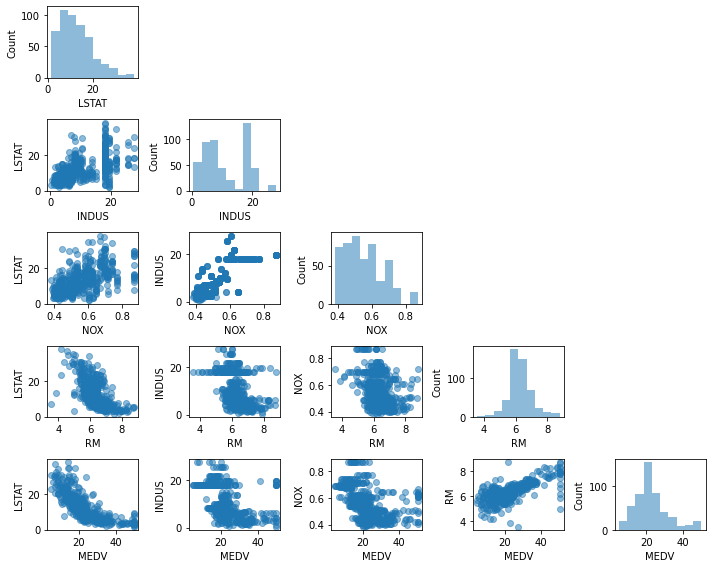

In [6]:
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
scatterplotmatrix(df[cols].values, figsize=(10,8), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

散布図を見るとRM(部屋の数)とMEDV(住宅価格)に線形の関係があるのがわかる。また、MEDVのヒストグラムを見ると正規分布に見えるが、外れ値もいくつか含まれていることがわかる。

### 10.2.3 相関行列を使って関係を調べる
相関行列はピアソンの積率相関係数 (相関係数) を成分とする正方行列である。相関係数は次の式で表される。
$$
r = \frac{\sum_{i=1}^{n}(x^{(i)} - μ_x)(y^{(i)} - μ_y)}{\sqrt{\sum_{i=1}^{n}(x^{(i)} - μ_x)^2}\sqrt{\sum_{i=1}^{n}(y^{(i)} - μ_y)^2}} = \frac{σ_{xy}}{σ_xσ_y}
$$  

$σ_{xy}$は特徴量xとyの共分散、$σ_x$と$σ_y$はそれぞれ特徴量の標準偏差である。

Numpyのcorrcoef関数を使うことで相関係数を求めることができる。以下のコードでは相関係数を求めた後、MLxtendのheatmap関数を用いて相関行列をヒートマップとしてプロットしている。

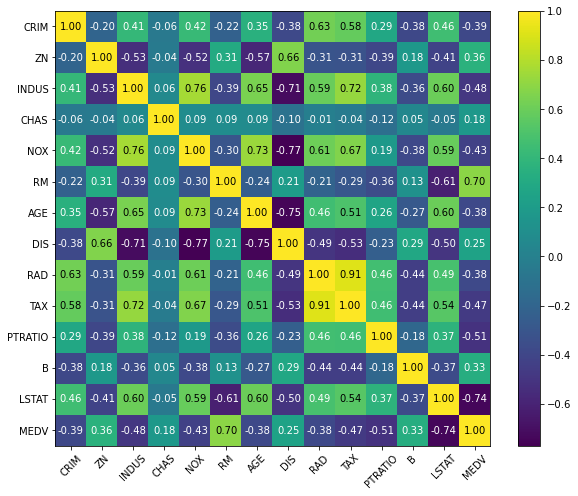

In [7]:
from mlxtend.plotting import heatmap
import numpy as np
cm2 = np.corrcoef(df[cols2].values.T) #相関係数を計算
hm2 = heatmap(cm2, row_names=cols2, figsize=(10,8), column_names=cols2)
plt.show()

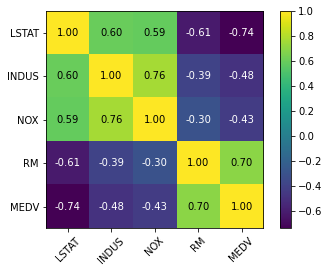

In [8]:
cm = np.corrcoef(df[cols].values.T) #相関係数を計算
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

上記の結果からMEDV(住宅価格)と相関が強い説明変数はLSTAT(低所得者の割合)とRM(部屋の数)であることがわかる。ここで一つ前に作図した散布図を見てみるとMEDVとLSTATの間には非線形の相関関係があることがわかる。一方、MEDVとRMの間には線形関係が見られるので、RMは単回帰分析に用いる説明変数として使えると考えられる。

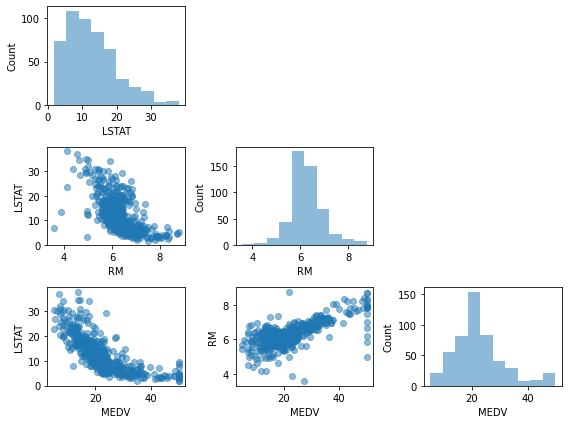

In [9]:
cols3 = ['LSTAT','RM','MEDV']
scatterplotmatrix(df[cols3].values, figsize=(8,6), names=cols3, alpha=0.5)
plt.tight_layout()
plt.show()

今回用いるデータの大きさを確認しておく。

In [10]:
print("RM", len(df['RM']))
print("MEDV", len(df["MEDV"]))

RM 505
MEDV 505


## 10.3 最小二乗線形回帰モデルの実装  
説明変数と目的変数の関係を最も良く表現している直線(回帰直線)を求めるには、残差($\hat{y} - y$)が最小となるような$w$を求めればいいと考えられる。  
ここからはさまざまなアプローチで回帰直線を求めていく。

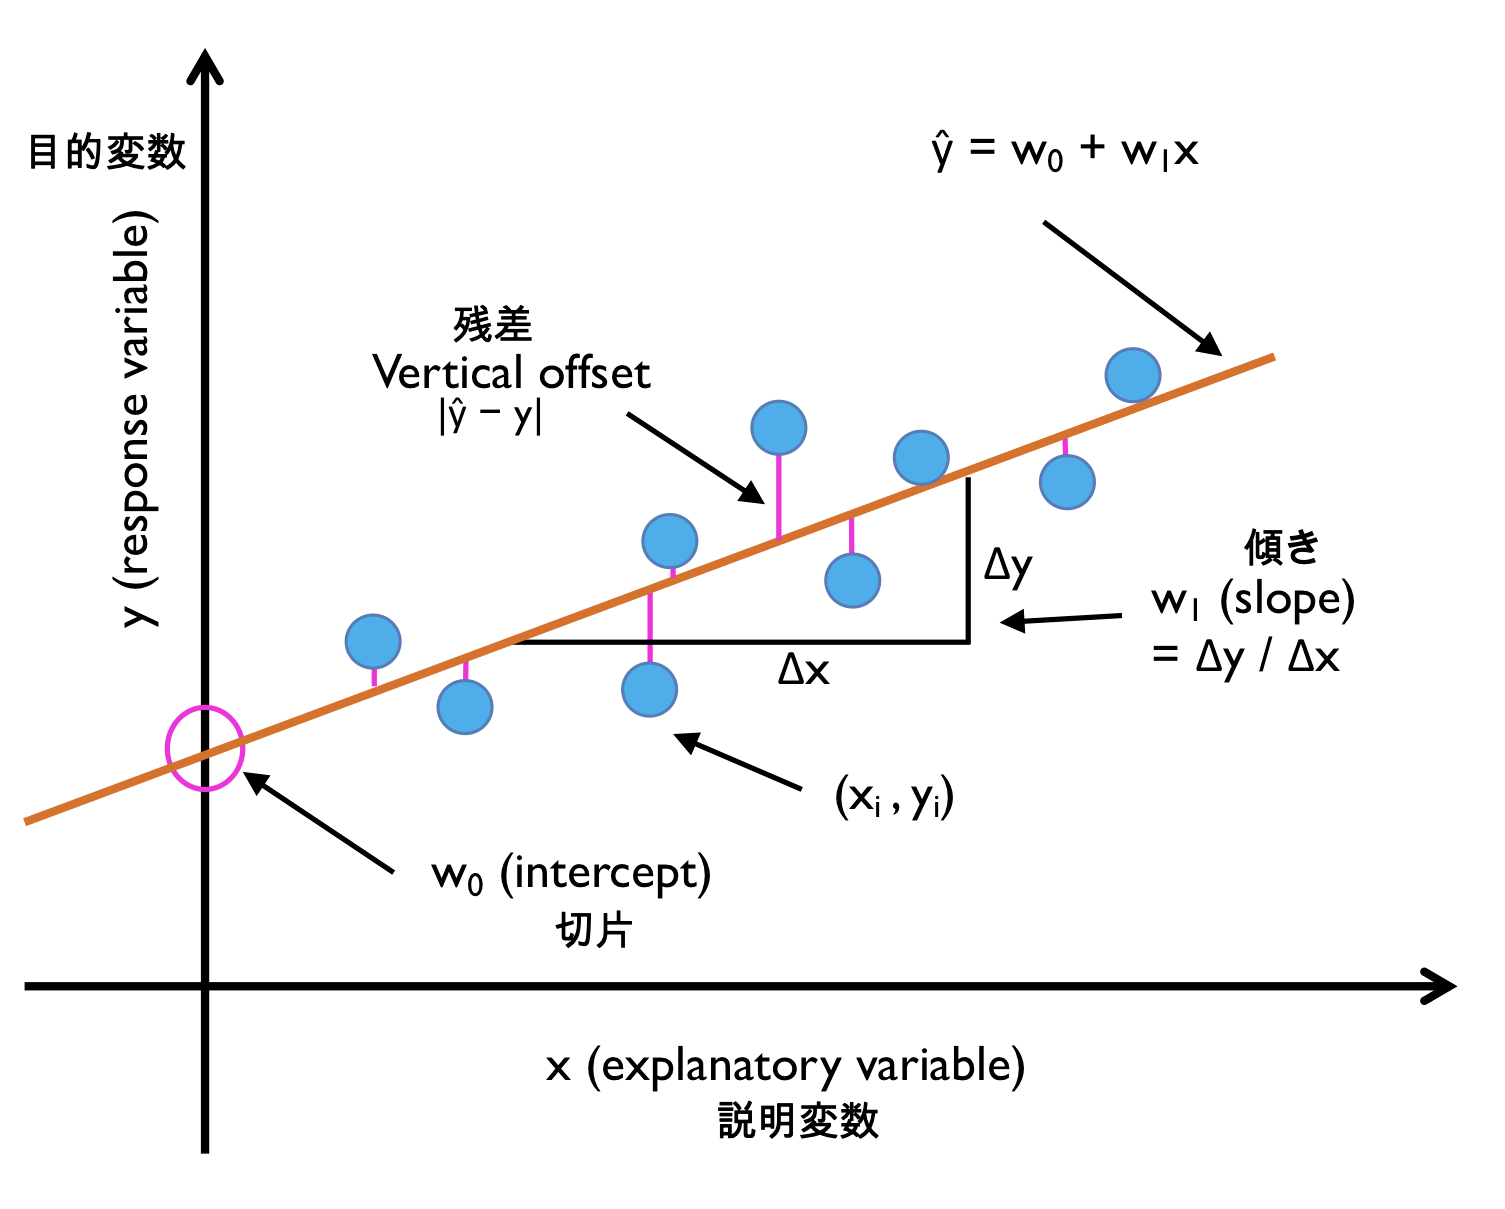

In [11]:
Image(filename='images/10_01_1.png', width=500)

### 10.3.1 勾配降下法を用いて回帰パラメータの回帰を解く  
本書の第2章で実装したADALINEのコードを用いて、回帰直線を求める。  
  
### 勾配降下法  (バッチ勾配降下法)
実測値を$y^{(i)}$、予測値を$\hat{y}^{(i)}=w_0 + w_1x^{(i)}$とする。
このとき、誤差平方和$(Jw)$は
$$
 J(w) = \frac{1}{2}\sum_{i=1}^{n}(y^{(i)} - \hat{y}^{(i)})^2  ...②
$$
と置くことができる(2乗する理由は、残差をそのまま合計してしまうと実測値が回帰直線の上側にある場合の残差と下側にある場合の残差が打ち消しあってしまうため。また、$1/2$がついている理由は$J(w)$を微分した際に出てくる係数の2を消すためである)。  
②のことをコスト関数という。ここで、コスト関数が最小となるような$w$の値を求めたい。

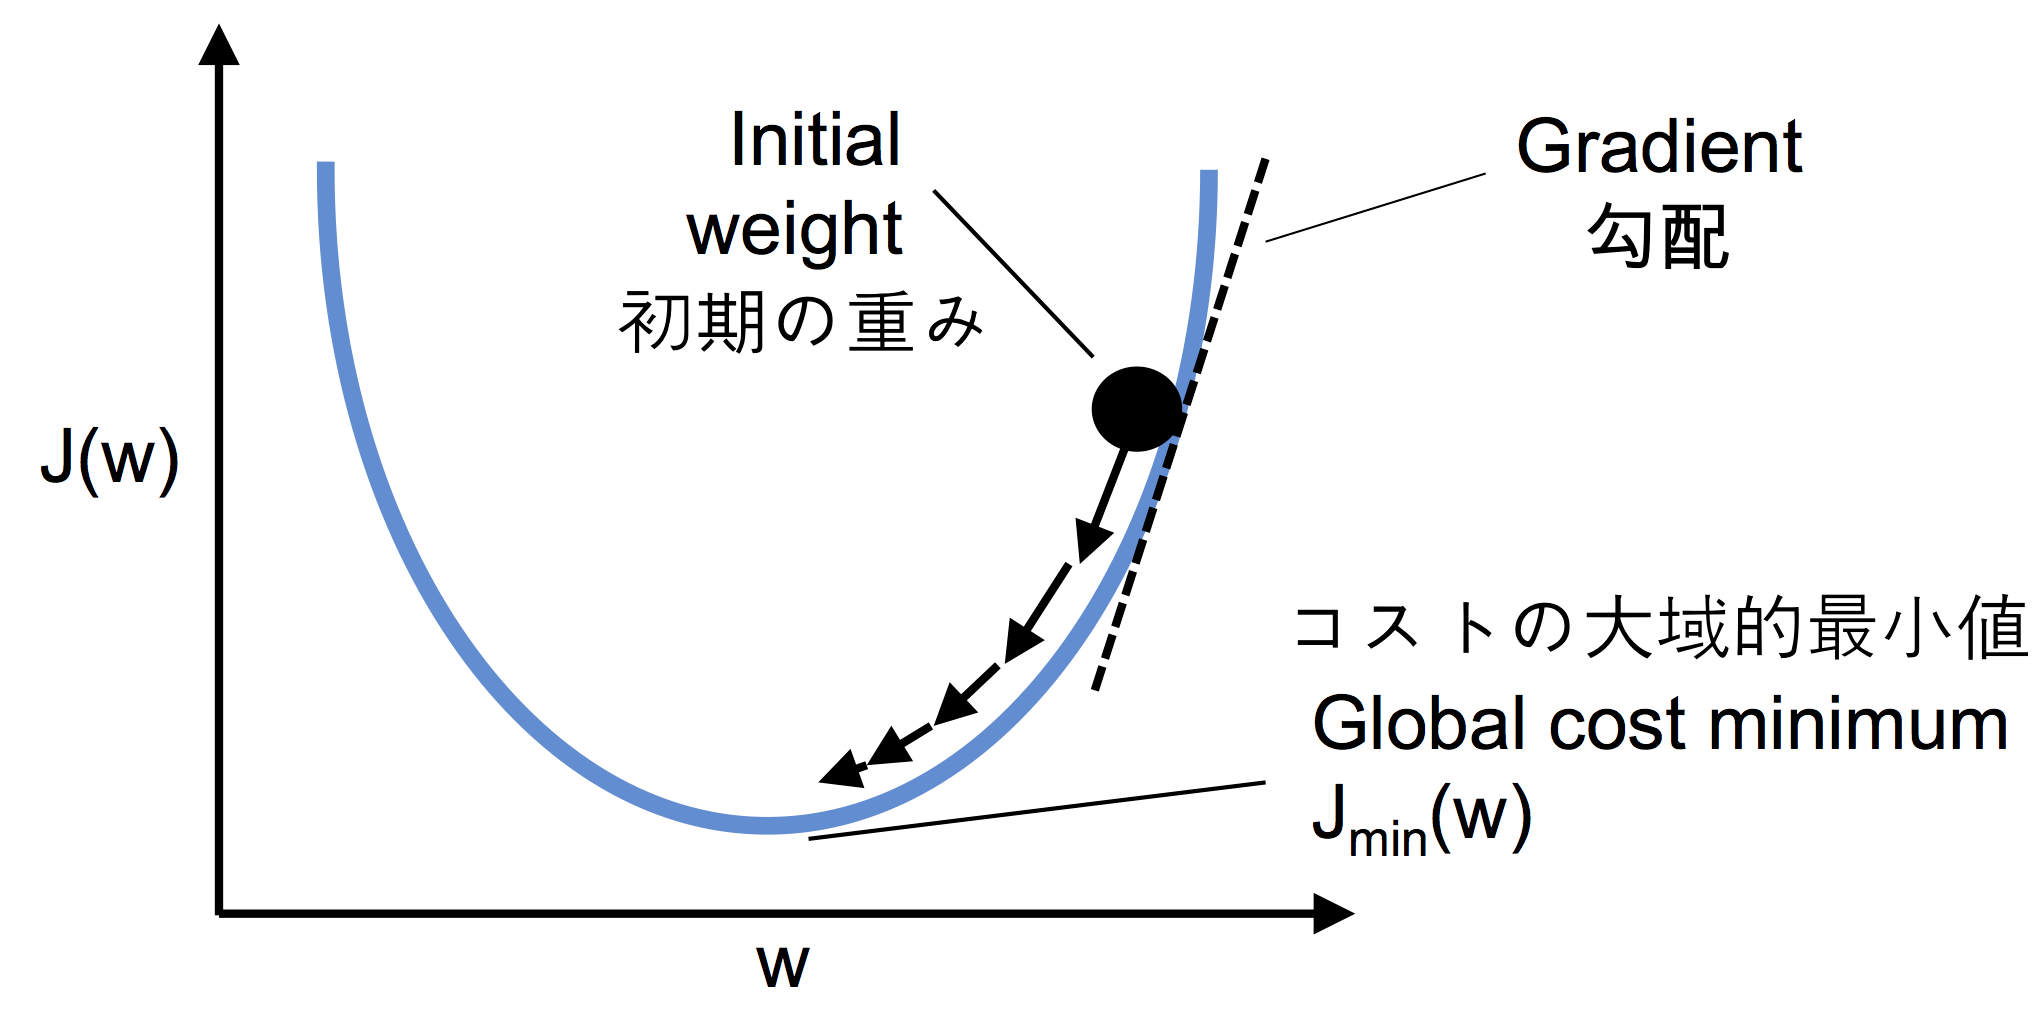

In [12]:
Image(filename='images/02_10_1.png', width=500) 

$w$をランダムな値とし、$J(w)$を$w$で偏微分することで$w$の地点での傾き(勾配)を求めることができる。その後、$w$を負の勾配方向に少しだけ動かす。これを繰り返していくことで$J(w)$が最小値を取るような$w$を求めることができる。  
$w$を負の勾配に対しどれだけ動かすかを学習率$η$という。  
$w$の更新を数式で表すと以下のようになる。  
$$ w := w + Δw $$
ここで、$Δw$は
$$ Δw = -η\frac{\partial J(w)}{\partial w} = η\sum_{i=1}^{n}(y^{(i)} - \hat{y}^{(i)}){x}^{(i)} ...③$$
  
重み$w$の更新は全ての訓練データ$x$に基づいて行われる。このように全ての訓練データに対して重みの更新を行う勾配降下法をバッチ勾配降下法という。 
  
勾配降下方は、データのスケールが異なっていると収束に時間がかかるため、あらかじめデータを標準化しておく必要がある。

In [13]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta #学習率
        self.n_iter = n_iter #訓練回数
    
    def net_input(self, X): 
        #総入力を計算する関数。説明変数Xと重みw_1のドット積とw_0の和。いわゆる𝑦̂=𝑤_0+𝑤_1𝑥の計算
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def fit(self, X, y): #訓練を実行するfit
        #重み(w)の初期化。要素が0のベクトル[0,0]を作成。w_0とw_1の値と考えて良い。今回はwの値を0からスタートするということ
        self.w_ = np.zeros(1 + X.shape[1]) 
        
        self.cost_ = [] #空のリスト。後で残差平方和のリストとして使う。コスト関数が収束したか確認するために使用する。

        for i in range(self.n_iter):
            output = self.net_input(X) #予測値を計算。net_inputを参照。
            errors = (y - output) #誤差を計算　実測値 - 予測値
            
            #重みw_1以降にΔwを足す(𝑤:=𝑤+Δ𝑤)　③の式の右辺側の計算 Xy
            self.w_[1:] += self.eta * X.T.dot(errors) 
            #重みw_0を更新　上の計算の説明変数Xが無いバージョン
            self.w_[0] += self.eta * errors.sum()
            
            cost = (errors**2).sum() / 2.0 #残差平方和を計算
            self.cost_.append(cost) #計算した残差平方和の値を格納
        return self

    def predict(self, X): #予測値を計算する。今回はnet_inputと同じ値を返している。
        return self.net_input(X)

In [14]:
#データの代入
X = df[['RM']].values
y = df['MEDV'].values 

In [15]:
from sklearn.preprocessing import StandardScaler
#標準化
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X) 
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten() #標準化するにあたって一度２次元データにする必要がある

In [16]:
#学習
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

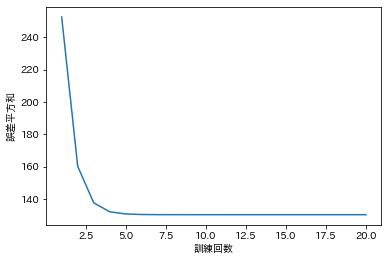

In [17]:
#cost_が収束しているか確認
import japanize_matplotlib
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('誤差平方和')
plt.xlabel('訓練回数')
plt.show()

In [18]:
#中身を見てみる
lr.cost_

[252.49999999999997,
 160.32375604107858,
 137.73827186504388,
 132.204263604811,
 130.84829323084745,
 130.516046589967,
 130.4346378567853,
 130.41469068193743,
 130.40980312542032,
 130.40860555188473,
 130.40831211642916,
 130.40824021740667,
 130.40822260034867,
 130.40821828372904,
 130.40821722604935,
 130.40821696689136,
 130.40821690339115,
 130.40821688783205,
 130.40821688401968,
 130.40821688308554]

次に線形回帰の直線が訓練データにどれだけ適応しているかを可視化してみる。

In [19]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70) #散布図を描画
    plt.plot(X, model.predict(X), color='black', lw=2) #回帰直線を描画   
    return None

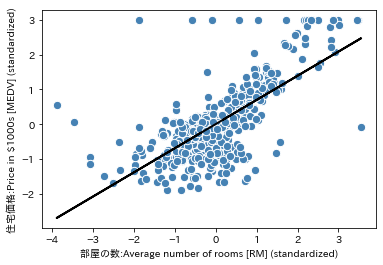

In [20]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('部屋の数:Average number of rooms [RM] (standardized)') #x軸：標準化された部屋の数
plt.ylabel('住宅価格:Price in $1000s [MEDV] (standardized)') #y軸：標準化された住宅価格の中央値
plt.show()

この図から、線形回帰直線は部屋の数が増えると住宅価格も上昇するという傾向を表しているといえる。また、$y=3$の時点でデータが一列になっていることがわかる。これは住宅価格がそこで打ち切られている可能性があることを示唆している。  
標準化されたデータを元の尺度に戻すには**StandardScaler**の**inverse_transform**メソッドを適用する。

In [21]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


部屋数が5の住宅の価格は10840ドルであるとわかる。  
また、標準化されている値を扱う場合、y軸の切片は常に0になるため厳密には切片の重みを更新する必要はない。このことは重みを出力してみると確認できる。

In [22]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: 0.000


### 線形回帰の解析的な求解  
研修の講義では**正規方程式**を利用して回帰直線を求めた。  
回帰直線の係数$w$は以下の式で求められる。  
$$
w = (X^TX)^{-1}X^Ty    …④
$$
ここで、$X$は$X = \left[\begin{array}{c}
            1 & x_1 \\
            ... & ... \\
            1 & x_n \\
        \end{array}\right]$
である。  
( $\hat{y}^{(i)}=w_0 + w_1x^{(i)}$を行列で表した式
$
\hat{y}^{(i)} = \left[\begin{array}{c}
            1 & x_1 \\
            ... & ... \\
            1 & x_n \\
        \end{array}\right]
        \left[\begin{array}{c}
            w_0 & w_1 \\
        \end{array}\right] \quad
$
の　　$\left[\begin{array}{c}
            1 & x_1 \\
            ... & ... \\
            1 & x_n \\
        \end{array}\right]$
の部分である。)  
これをpythonで実装すると次のようになる。

In [23]:
#"1"で構成された列ベクトルを追加
Xb = np.hstack((np.ones((X.shape[0], 1)), X)) #要素が1の505×1行列を作り、Xに横方法に結合
#w = np.zeros(X.shape[1])　#これいらない?
z = np.linalg.inv(np.dot(Xb.T, Xb)) #④の式の右辺の括弧の部分を計算(np.linalg.inv()で逆行列を求めることができる)
w = np.dot(z, np.dot(Xb.T, y)) #式全体を計算
print('Slope: %.3f' % w[1]) #傾き
print('Intercept: %.3f' % w[0]) #切片

Slope: 9.103
Intercept: -34.677


標準化していないので勾配降下法で求めた傾きと切片が異なるが、次に行うscikit-learnで求める回帰直線の傾きと切片の値と同じである。  
なお、逆行列を求める計算は処理が重いため、この方法は大きなデータセットに対しては向いていない。  
今回はデータの量がそこまで多く無いため計算できた。  
実際にグラフにしてみると次のようになった。

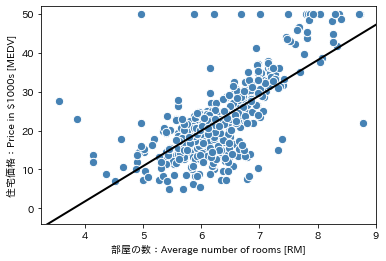

In [24]:
%matplotlib inline
fig = plt.figure(figsize = (6, 4))

# 直線の式を定義
x_i = np.arange(0, 20)
y_i = w[1]*x_i + w[0]
#描画範囲を指定
plt.xlim(3.25,9)
plt.ylim(-4,52)
# 直線をプロット
plt.plot(x_i, y_i, color = "black", lw = 2)
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)

plt.xlabel('部屋の数：Average number of rooms [RM]') #x軸：標準化された部屋の数
plt.ylabel('住宅価格：Price in $1000s [MEDV]') #y軸：標準化された住宅価格の中央値
plt.show()

描画した結果、グラフの形も勾配降下法で得られたものとほぼ一致した。部屋数が増えると住宅価格が上昇するという特徴を表現できているといえる。   
同様に次に行うscikit-learnを用いた方法で得られたものともほぼ一致した。

## scikit-learnを使って回帰モデルの係数を推定する  
scikit-learnを使うことでより効率的に回帰分析のモデルを実装できる。scikit-learnの回帰推定の多くはscipyの最小二乗法の実装(scipy.linalg.lstsq)を利用している。この実装はLAPACK(Linear Algebara PACKage)に基づく高度な最適化を利用している。  
また、scikit-learnで線形回帰は勾配降下法に基づく最適化を利用しないため、標準化されていないデータの方がうまくいく。

※LAPACKとは
数値線形代数のための数値解析ソフトウェアライブラリで、線型方程式や線型最小二乗問題、固有値問題、特異値問題等を数値的に解くために利用される。(wikipediaより)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.103
Intercept: -34.677


標準化されていないため、傾きと切片が勾配降下法で求めたものと変わっていることがわかる。また、正規方程式を利用した計算結果と値が同じである。この結果を実際に散布図にプロットしてみると、回帰直線は勾配降下法で求めた回帰直線とほぼ一致することがわかる。

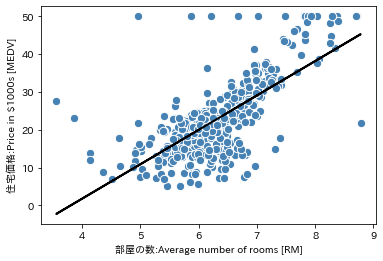

In [27]:
lin_regplot(X, y, slr)
plt.xlabel('部屋の数:Average number of rooms [RM]')
plt.ylabel('住宅価格:Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()